# **1. The Aim**

The project uses data from an anonymous organization's social media ad campaign, which can be downloaded as a CSV file [here](https://drive.google.com/file/d/16ardVvuPHItlLHGc_I_MkMDOwUvutXrm/view?usp=share_link). The file contains 1143 observations across 11 variables such as ad ID, campaign IDs, age, gender, interests, impressions, clicks, spent, and conversion data.

The main objective of the study is to analyze the A/B test results of sales and impressions from two different advertising methods. The goal is to determine if the difference in results between the two methods is due to chance or if there is a significant effect on sales and impressions.

The study aims to understand the data, prepare it for analysis, conduct A/B testing, and make recommendations based on the findings. Hypotheses will be formulated and tested, and assumptions such as normal distribution and variance homogeneity will be checked. The conclusion will be drawn based on the results of the study, and recommendations will be made accordingly.



---




Below are the descriptions of the variables:

1. ad_id: an unique ID for each ad.


2. xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3. fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4. age: age of the person to whom the ad is shown.

5. gender: gender of the person to whim the add is shown

6. interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7. Impressions: the number of times the ad was shown.

8. Clicks: number of clicks on for that ad.

9. Spent: Amount paid by company xyz to Facebook, to show that ad.

10. Total conversion: Total number of people who enquired about the product after seeing the ad.

11. Approved conversion: Total number of people who bought the product after seeing the ad.

#**2. Exploring the data**


##Imports

---



In [ ]:
import numpy as np
import pandas as pd 

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, \
    kendalltau, f_oneway, kruskal

## Understanding the data

In [ ]:
df = pd.read_csv('KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
df.shape


(1143, 11)

In [ ]:
df.dtypes


ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

**Observation**: Using string data type for age and gender variables is not advisable as it can create problems while analyzing the data. It is better to use numerical data types for age and categorical data types for gender to ensure smooth data analysis.

In [ ]:
# Identifying the null values

df.isnull().sum()


ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

**Observation** : There are no null values in the column

In [ ]:
# Describing the data

df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,708746.0,734245.3,1121185.00,1314348.900,1.314403e+06,1.314415e+06,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,916.0,936.0,1178.00,1178.000,1.178000e+03,1.178000e+03,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,103916.0,108660.4,144549.00,179915.900,1.799696e+05,1.799820e+05,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,2.0,10.0,25.00,105.900,1.120000e+02,1.140000e+02,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,87.0,741.2,51509.00,894449.400,1.331683e+06,3.052003e+06,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,0.0,0.0,8.00,161.900,2.620600e+02,4.210000e+02,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,0.0,0.0,12.37,248.508,3.785852e+02,6.399500e+02,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,0.0,1.0,1.00,11.000,2.300000e+01,6.000000e+01,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.0,0.0,1.00,4.000,9.000000e+00,2.100000e+01,2.100000e+01


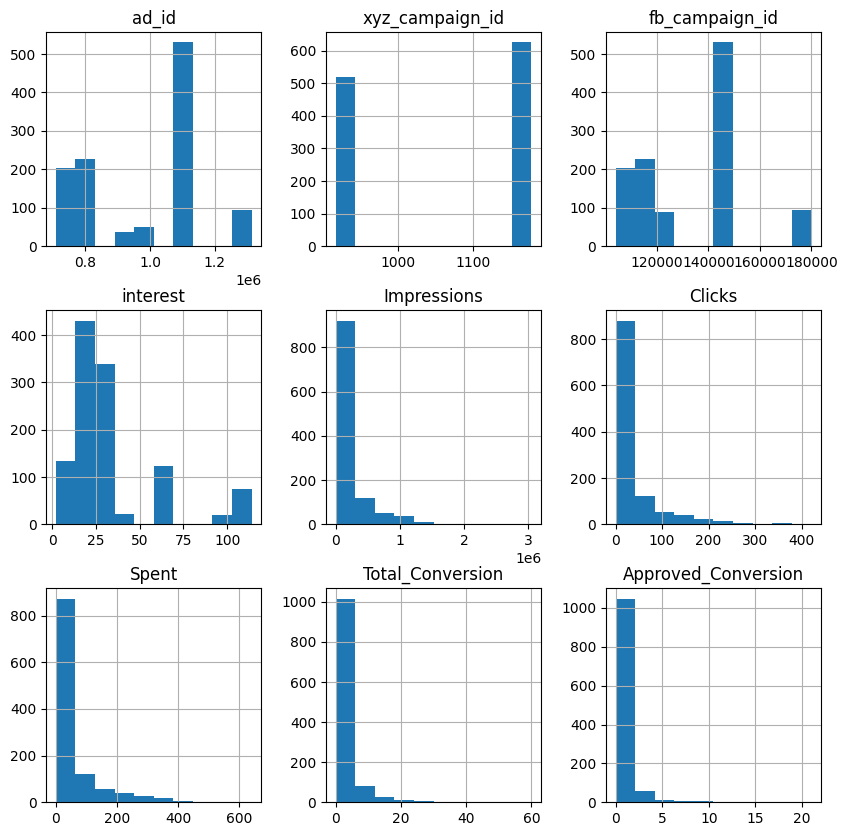

In [ ]:
# Let's look at the general distribution of numerical data

df.hist(bins=10, figsize = (10, 10))
plt.savefig("Hist.png")


<Axes: >

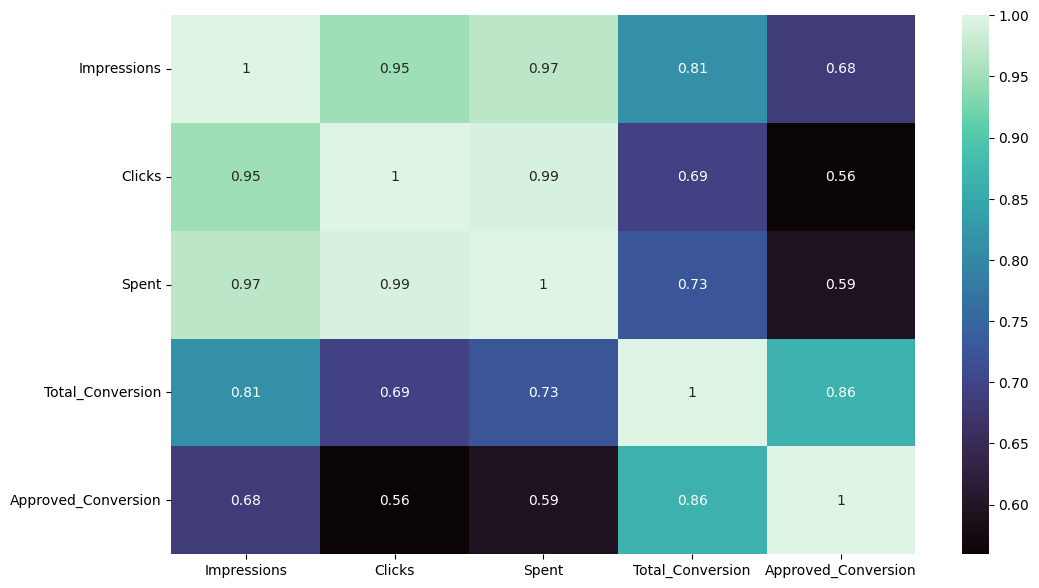

In [ ]:
fig = plt.figure(figsize=(12,7))
sns.heatmap(df[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']].corr(), annot=True, cmap='mako')

Let's start by looking at how many ads the company ran per campaign.

Text(0.5, 0, 'Count of Ads')

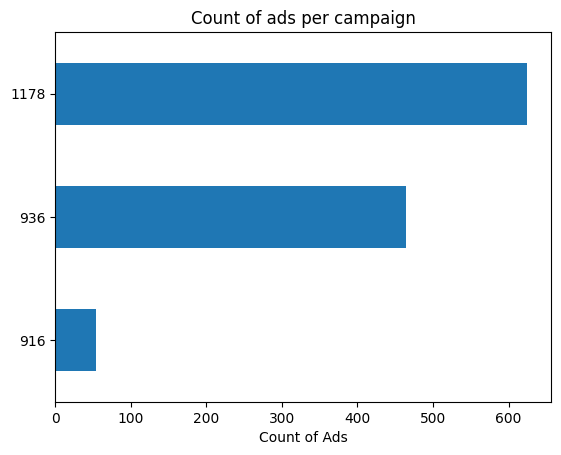

In [ ]:
df.groupby('xyz_campaign_id')['ad_id'].count().plot(kind='barh')
plt.title('Count of ads per campaign')
plt.ylabel('')
plt.xlabel('Count of Ads')

By the above graph we can infer that  Campaign C has the most number of ads. Let's see how each of these campaigns fare in approved conversions.



Text(0.5, 0, '')

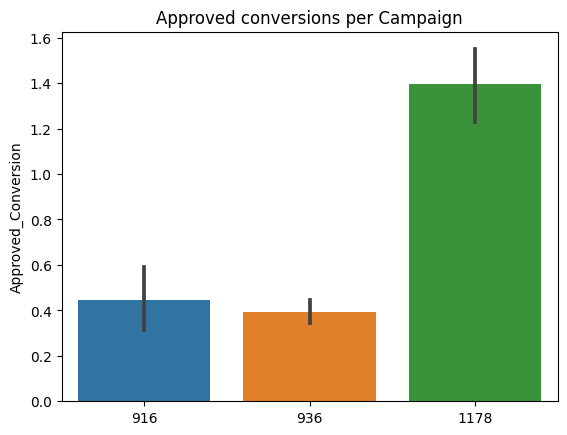

In [ ]:
sns.barplot(x='xyz_campaign_id', y=df['Approved_Conversion'], data=df)
plt.title('Approved conversions per Campaign')
plt.xlabel('')

<Axes: xlabel='age', ylabel='count'>

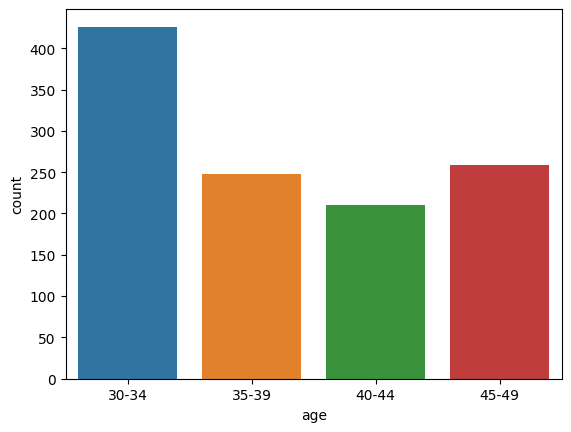

In [ ]:
# Age
sns.countplot(x='age', data=df)


Text(0.5, 1.0, 'Impressions per age group')

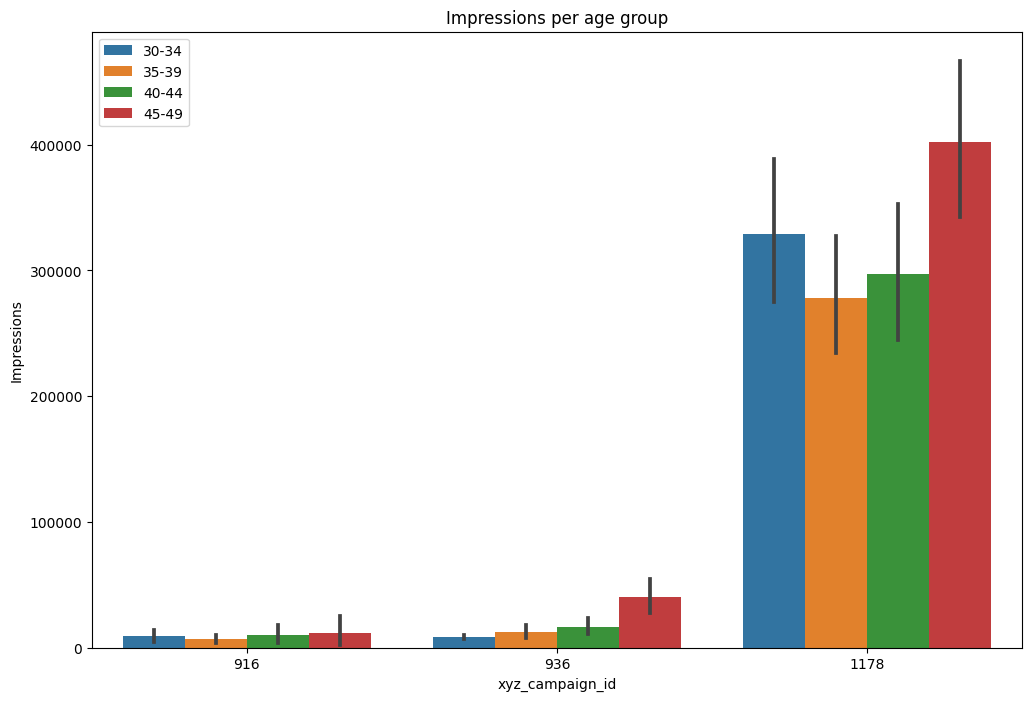

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Impressions', data=df, hue='age')
plt.legend(loc='upper left')
plt.title('Impressions per age group')

We can see that the age group of 45-49 had seen the ads the most across all campaigns



Text(0.5, 1.0, 'Clicks per age group')

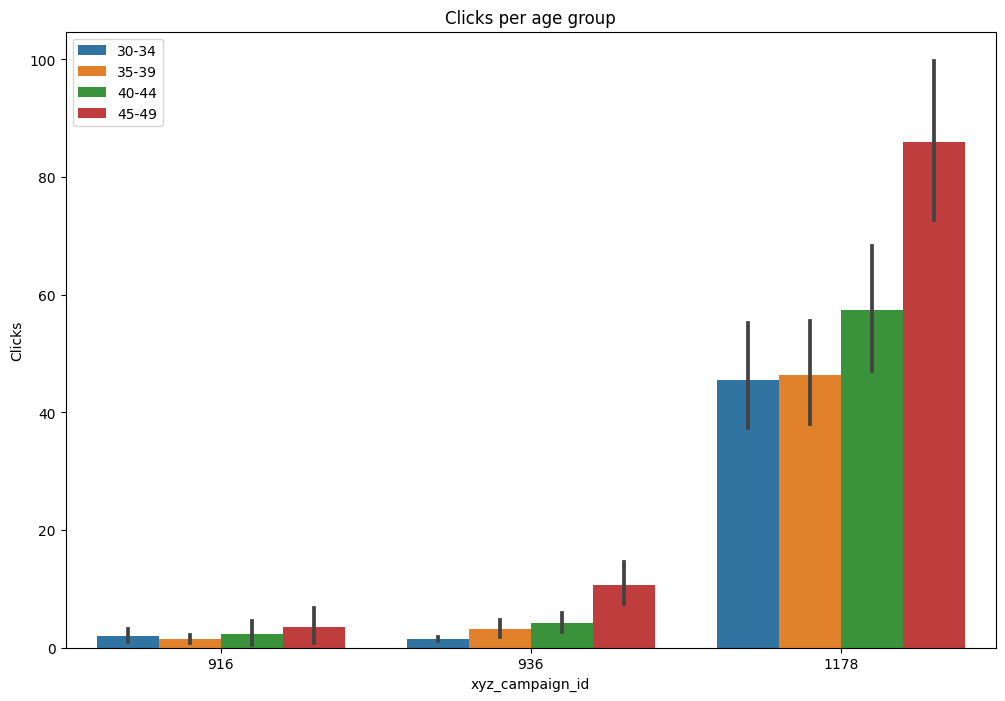

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Clicks', data=df, hue='age')
plt.legend(loc='upper left')
plt.title('Clicks per age group')

The age group who clicked the ads the most were also from 45-49 yrs old.



Text(0.5, 1.0, 'Total Conversion per age group')

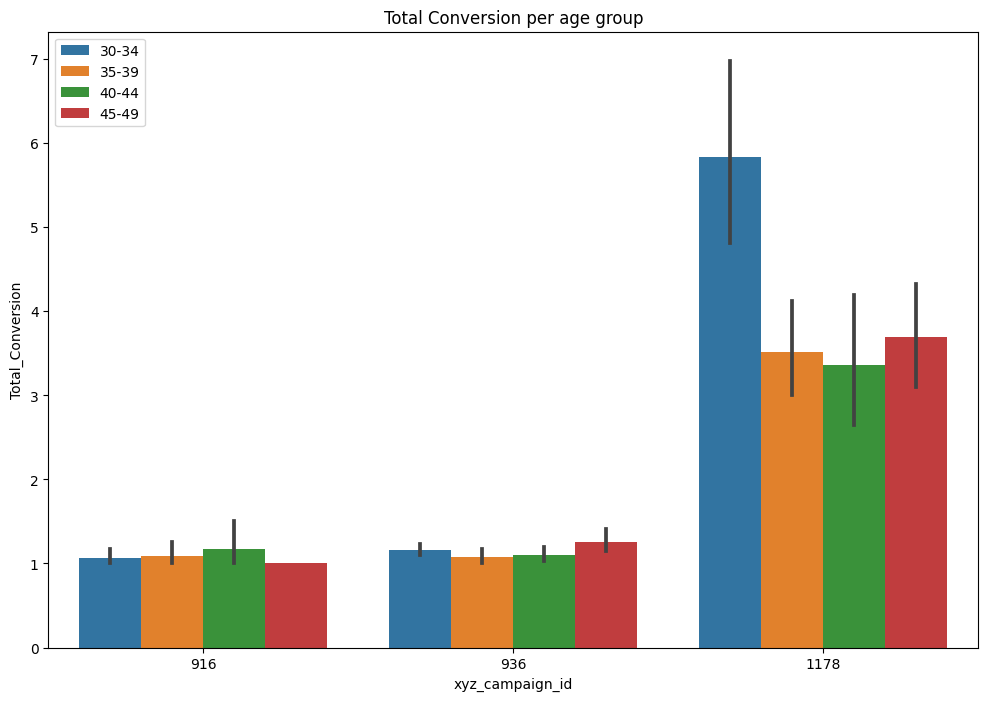

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Total_Conversion', data=df, hue='age')
plt.legend(loc='upper left')
plt.title('Total Conversion per age group')

But people who enquired about the products varied across the campaigns.

Campaign a: 40-44 \ Campaign b: 45-49 \ Campaign c: 30-34

Text(0.5, 1.0, 'Approved Conversions per age group')

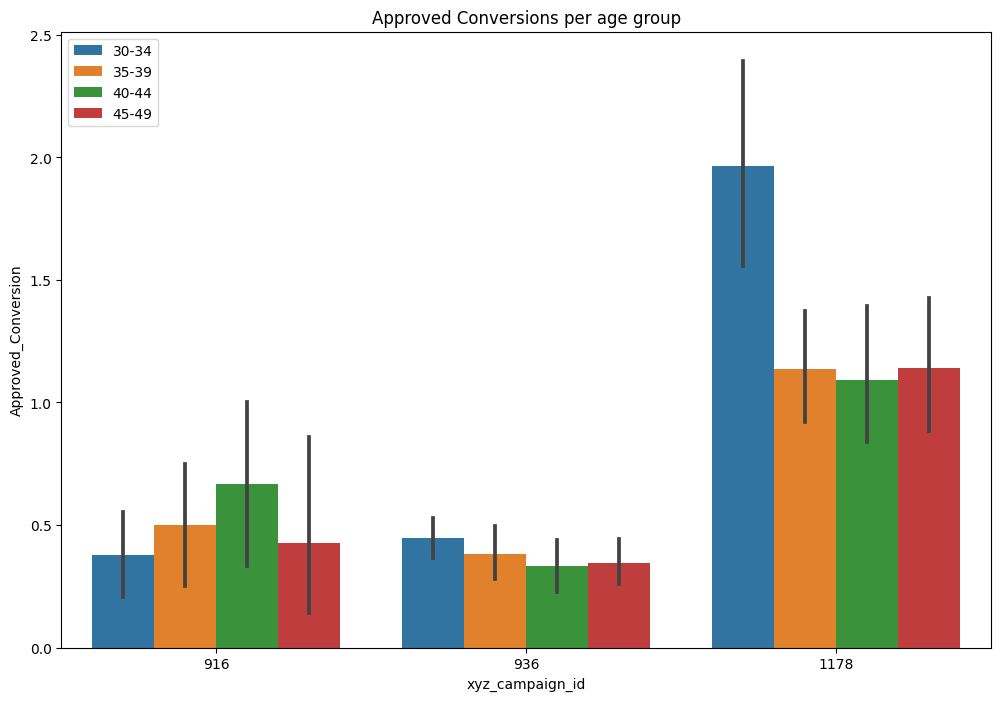

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', data=df, hue='age')
plt.legend(loc='upper left')
plt.title('Approved Conversions per age group')

And people who bought the products the most are also different per campaign.

Campaign a: 40-44 \ Campaign b: 30-34 \ Campaign c: 30-34

---

**Gender**

<Axes: xlabel='gender', ylabel='count'>

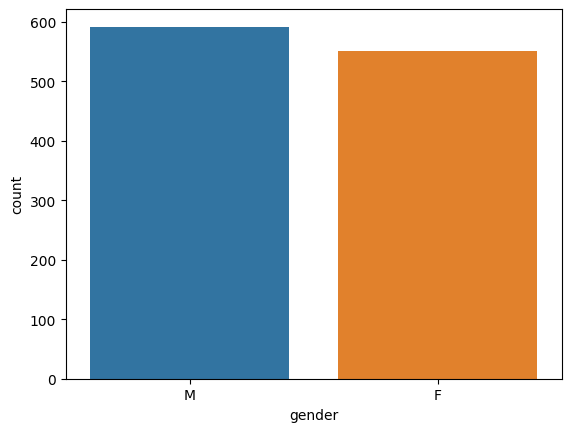

In [ ]:
sns.countplot(x='gender', data=df)


<Axes: xlabel='xyz_campaign_id', ylabel='Impressions'>

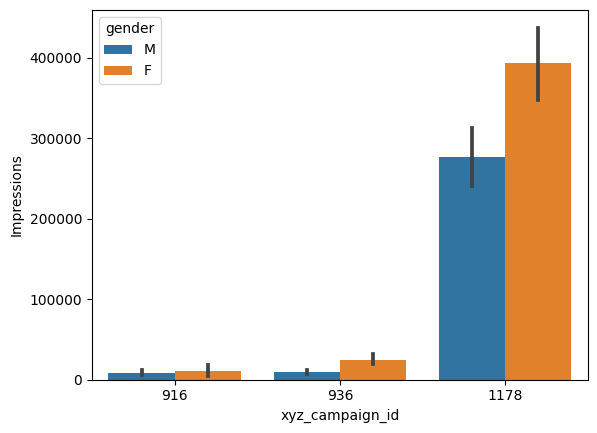

In [ ]:
sns.barplot(x='xyz_campaign_id', y='Impressions', hue='gender', data=df)


<Axes: xlabel='xyz_campaign_id', ylabel='Clicks'>

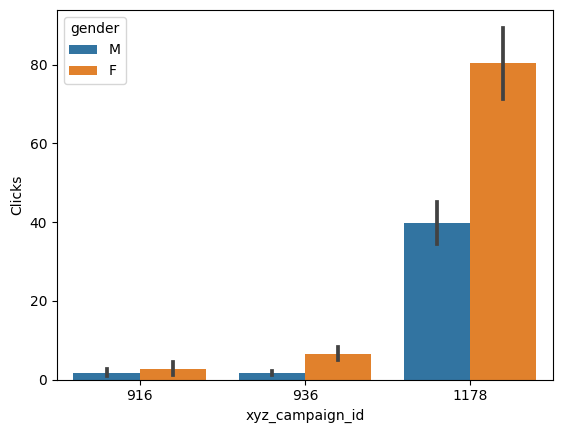

In [ ]:
sns.barplot(x='xyz_campaign_id', y='Clicks', hue='gender', data=df)


<Axes: xlabel='xyz_campaign_id', ylabel='Total_Conversion'>

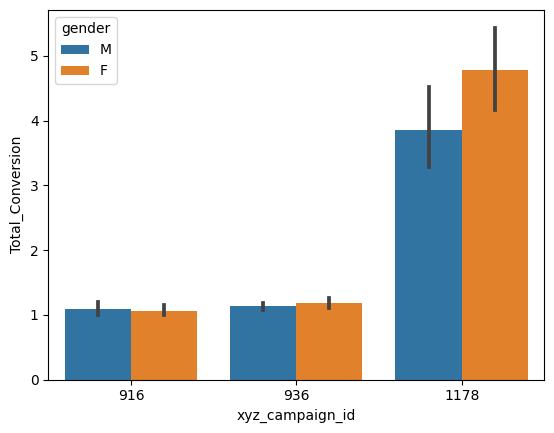

In [ ]:
sns.barplot(x='xyz_campaign_id', y='Total_Conversion', hue='gender', data=df)


<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

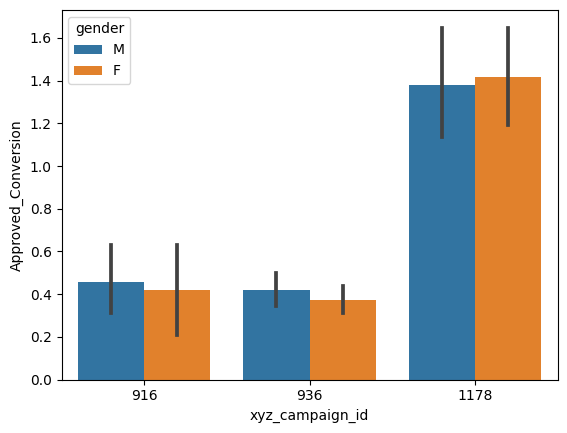

In [ ]:
sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', hue='gender', data=df)


**Interests**

Text(0.5, 1.0, 'Distribution of interests')

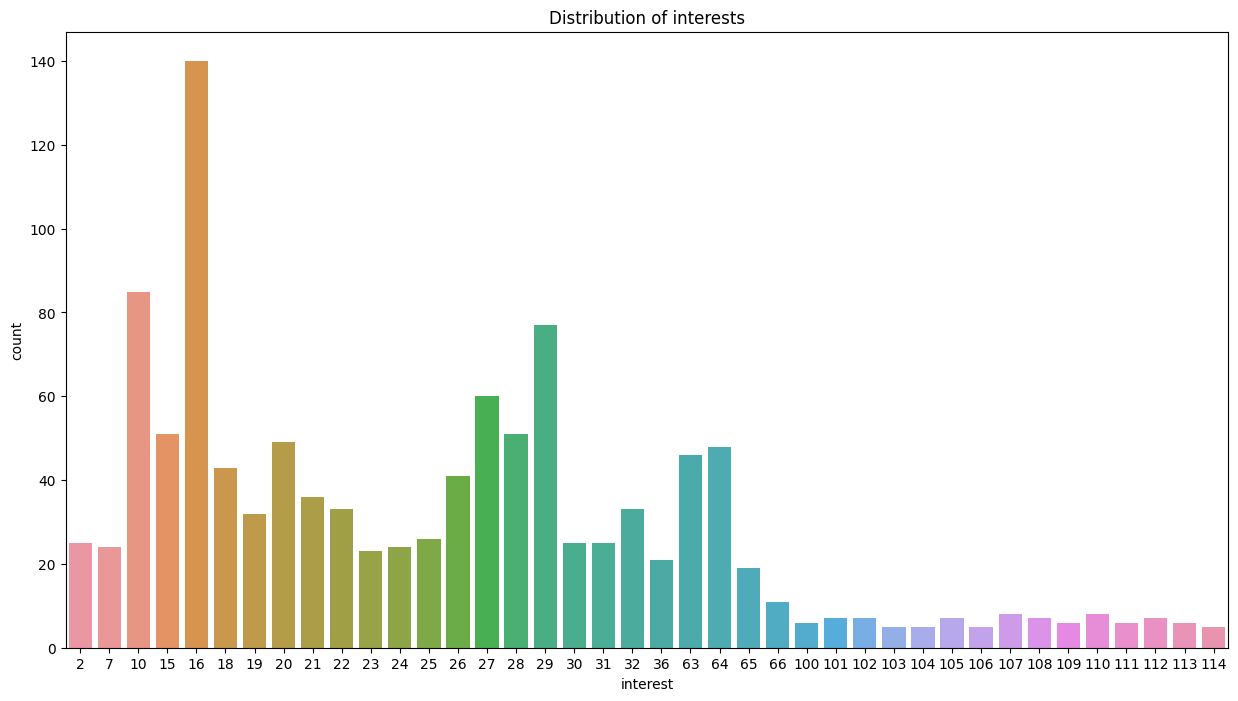

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='interest', data = df)
ax.set_title('Distribution of interests')

*Let's look at the distribution of interest by campaign*




Text(0.5, 0.98, 'Distribution of interests recorded per campaign')

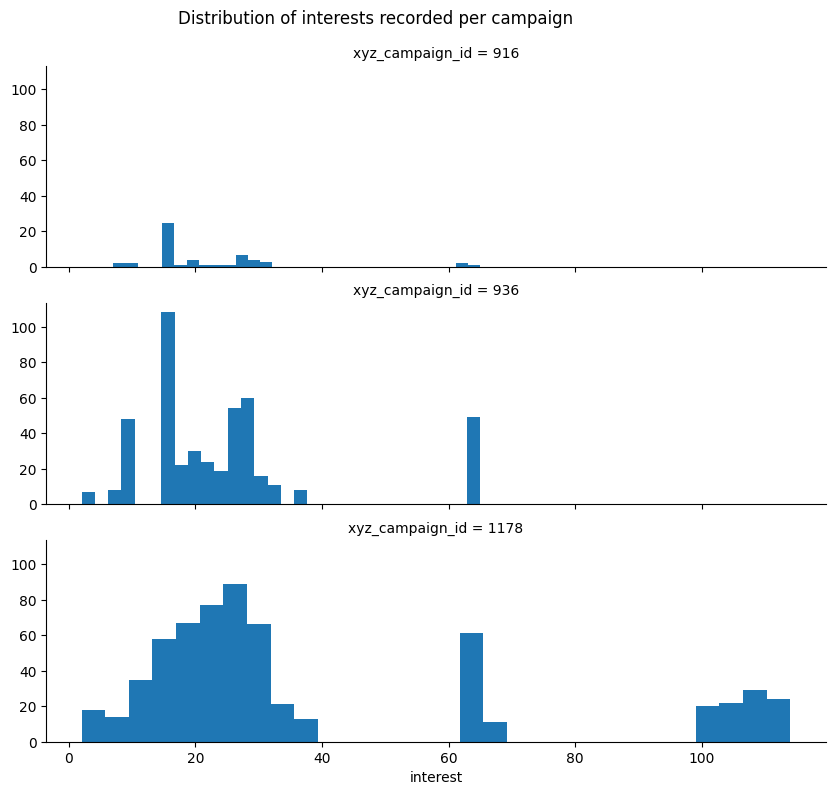

In [ ]:
g = sns.FacetGrid(df,row='xyz_campaign_id')
g.map(plt.hist, 'interest', bins = 30)
g.fig.set_size_inches(10,8)
plt.subplots_adjust(top=0.91)
g.fig.suptitle('Distribution of interests recorded per campaign')

Text(0.5, 1.0, 'Top 10 interests and their average approved conversion (across all campaigns)')

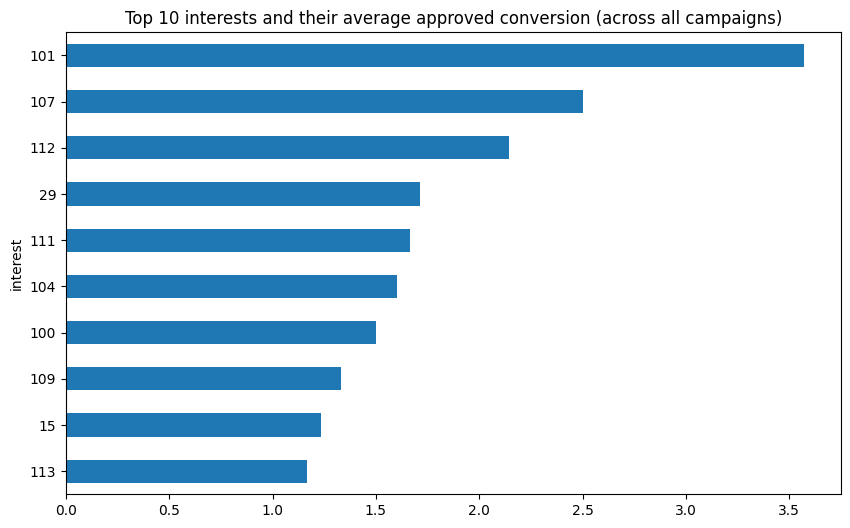

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('interest')['Approved_Conversion'].agg('mean').sort_values().tail(10).plot(kind='barh')
plt.title('Top 10 interests and their average approved conversion (across all campaigns)')

In the graph above, we can see the top 10 interests which had the most sales.



### In-depth analysis of Campaign C


As Campaign C had the most data, it's worth looking into this to provide a more actionable insight to our marketing team



In [54]:
df['xyz_campaign_id']


0        916
1        916
2        916
3        916
4        916
        ... 
1138    1178
1139    1178
1140    1178
1141    1178
1142    1178
Name: xyz_campaign_id, Length: 1143, dtype: int64

In [56]:
# Creating a subset of the data in campaign c 
df_camp_c = df.query('xyz_campaign_id == 1178').reset_index(drop=True)
df_camp_c.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14
1,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5
2,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1
3,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2
4,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2


Let's go over each feature and see how it influences approved_conversion



Text(0.5, 1.0, 'Average spending based on Age')

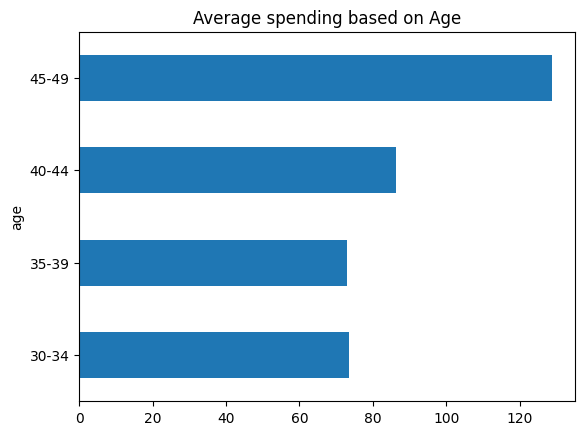

In [57]:
df_camp_c.groupby('age')['Spent'].agg('mean').plot(kind='barh')
plt.title('Average spending based on Age')

Text(0.5, 1.0, 'Average approved conversions based on age')

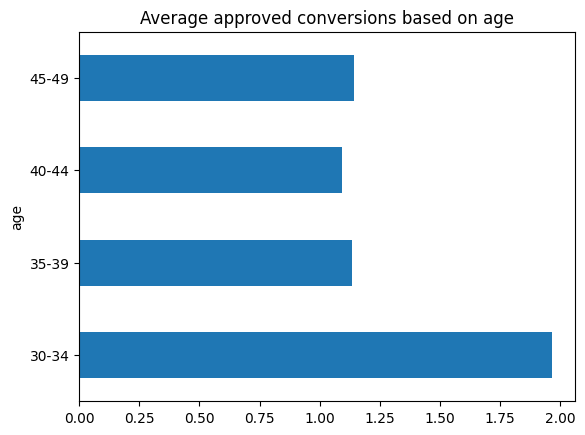

In [58]:
df_camp_c.groupby('age')['Approved_Conversion'].agg('mean').plot(kind='barh')
plt.title('Average approved conversions based on age')

Despite spending more in the age group 45-49, the age group of 30-34 buys the product almost twice as much.



Text(0.5, 1.0, 'Average spending based on gender')

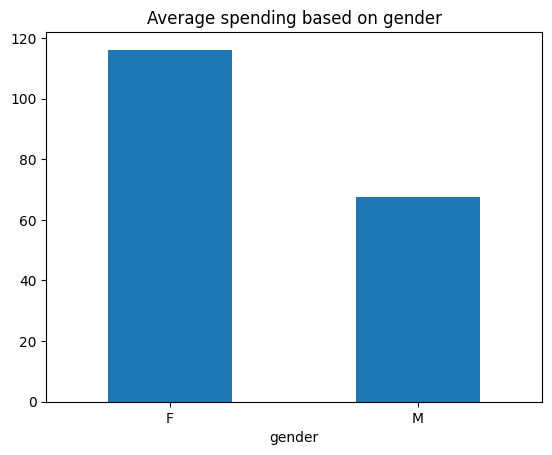

In [59]:
df_camp_c.groupby('gender')['Spent'].agg('mean').plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Average spending based on gender')

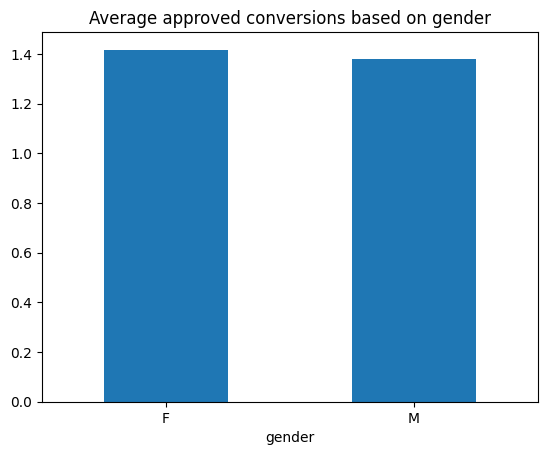

In [60]:
df_camp_c.groupby('gender')['Approved_Conversion'].agg('mean').plot(kind='bar')
plt.title('Average approved conversions based on gender')
plt.xticks(rotation=0)
plt.show()

There seems to be no significant differences between genders. It should be noted that we are spending more on female customers.

In [61]:
df_spent_interest = df_camp_c.groupby('interest')[['Spent','Approved_Conversion']].agg('mean').sort_values(by='Spent',ascending=False).reset_index()

Text(0.5, 1.0, 'Average Approved Conversion per Interest')

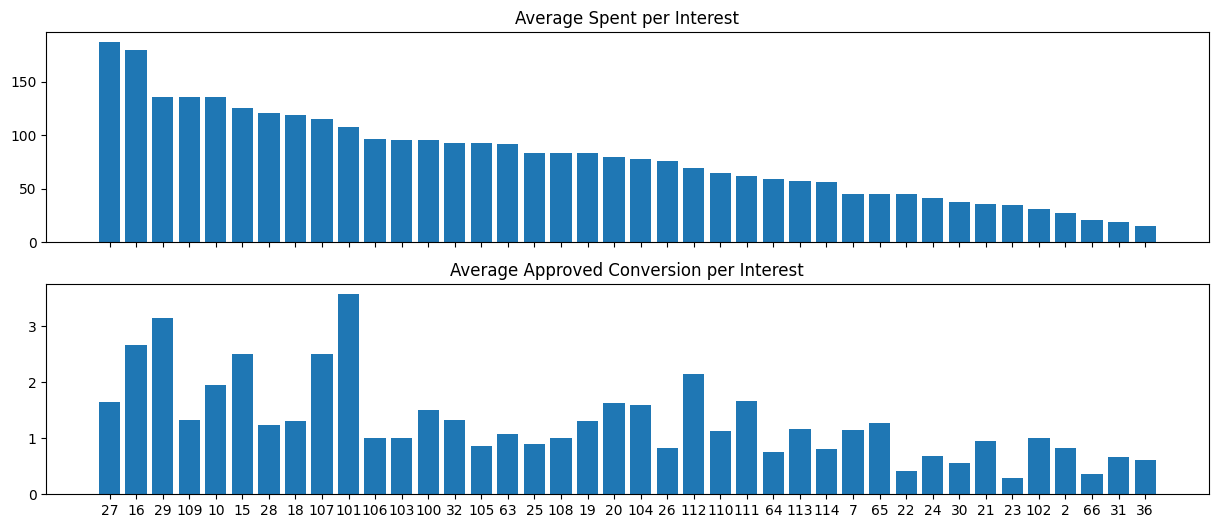

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6), sharex=True)

ax[0].bar(x=df_spent_interest.interest.astype(str), height=df_spent_interest.Spent)
ax[0].set_title('Average Spent per Interest')


ax[1].bar(x=df_spent_interest.interest.astype(str), height=df_spent_interest['Approved_Conversion'])
ax[1].set_title('Average Approved Conversion per Interest')

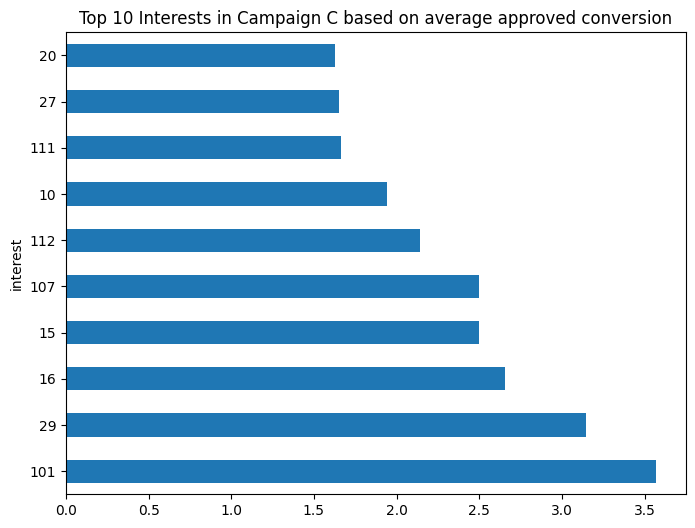

In [63]:
plt.figure(figsize=(8,6))
fig = df_camp_c.groupby('interest')['Approved_Conversion'].agg('mean').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Interests in Campaign C based on average approved conversion')
plt.show()

**Conclusion **

After conducting our analysis, we can provide the following actionable insights to our marketing team based on the data from Campaign C:

1. Age Group: The age group of 30-34 had the highest approved conversion, so the marketing team may want to focus their efforts on this age group to improve sales.

2. Gender: On average, there was no significant difference in approved conversions between genders. However, since targeting male audiences may be more cost-effective, the marketing team may want to consider focusing more on this demographic.

3. Interests: Certain interests had a higher number of approved conversions, including interests 101, 29, 16, 15, 107, 112, 10, 111, 27, and 20. The marketing team can use this information to tailor their advertising campaigns to target individuals with these interests.

Overall, the marketing team should take these insights into consideration when developing their strategies to improve sales. By targeting the right age group, gender, and interests, they may be able to increase the number of approved conversions and ultimately improve the effectiveness of their campaigns.

# **3. A/B testing**

In [ ]:
# Normal Distribution
test_stat, pvalue = shapiro(df.loc[df["xyz_campaign_id"] == 936, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# Normal Distribution control for Id 1178

test_stat, pvalue = shapiro(df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.3912, p-value = 0.0000
Test Stat = 0.6933, p-value = 0.0000


In [ ]:
# Variance Homogeneity Assumption:
####################################

# H0: Variance is homogeneous.
# H1: Variance is not homogeneous.

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

test_stat, pvalue = levene(df.loc[df["xyz_campaign_id"] == 936, "Impressions"],
                            df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# According to p-values, H0 =  Cannot Reject

Test Stat = 2.3178, p-value = 0.1285


In [ ]:
# Apply of the Hypothesis:

test_stat, pvalue = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 936, "Impressions"],
                            df.loc[df["xyz_campaign_id"] == 916, "Impressions"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# If p-value < 0.05, H0 = Reject
# If p-value > 0.05 H0 = Cannot Reject.

Test Stat = 13311.5000, p-value = 0.4520


The A/B testing was conducted to determine if the advertising strategies labeled "936" and "936" had an effect on total impressions and sales. The first step in the testing process was to check if the means of the two strategies were equal. To do this, the normal distribution and variance homogeneity assumptions were verified.

If the normal distribution assumption is not met, the Mann-Whitney U test is used to compare the two strategies. In this study, the Mann-Whitney U test was conducted and the resulting p-value was 0.4520. Since the p-value is higher than the significance level, the null hypothesis cannot be rejected. This means that there is no significant difference between the two advertising strategies, and any difference in the results may have occurred by chance. Therefore, the conclusion of the A/B testing suggests that both advertising strategies had similar effects on total impressions and sales.